### Logistic Regression-Assement

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import os
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

################# visualization #################
import matplotlib.pyplot as plt 
from PIL import  Image
import seaborn as sns 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

### 1.Data Importing

In [24]:
education= pd.read_csv (r"C:\Users\Pallavi\Desktop\DEEKSHA\Machine learning\TEST\logisticRegression\xAPI-Edu-Data.csv")
education

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### 2. Data Pre-Processing

In [25]:
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [26]:
education.ParentschoolSatisfaction.value_counts()

Good    292
Bad     188
Name: ParentschoolSatisfaction, dtype: int64

### Identifying & Treatment Missing Value

In [27]:
education.isna().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [28]:
education.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [29]:
for column in ['gender','NationalITy','PlaceofBirth','StageID','GradeID','SectionID','Topic','Semester','Relation',
               'ParentAnsweringSurvey','ParentschoolSatisfaction','StudentAbsenceDays','Class']:
            print(education[column].value_counts())
          

M    305
F    175
Name: gender, dtype: int64
KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
USA              6
Iran             6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64
KuwaIT         180
Jordan         176
Iraq            22
lebanon         19
SaudiArabia     16
USA             16
Palestine       10
Egypt            9
Tunis            9
Iran             6
Syria            6
Lybia            6
Morocco          4
venzuela         1
Name: PlaceofBirth, dtype: int64
MiddleSchool    248
lowerlevel      199
HighSchool       33
Name: StageID, dtype: int64
G-02    147
G-08    116
G-07    101
G-04     48
G-06     32
G-11     13
G-12     11
G-09      5
G-10      4
G-05      3
Name: GradeID, dtype: int64
A    283
B    167
C     30
Name: SectionID, dtype: int64
IT           95
French       65
Arabic       59
Science      51
E

In [30]:
education.Class.value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

### Q1. Visualize just the categorical features individually to see what options are included and how each option fares when it comes to count(how many times it appears) and see what can be deduce from that?

<AxesSubplot:xlabel='StudentAbsenceDays', ylabel='count'>

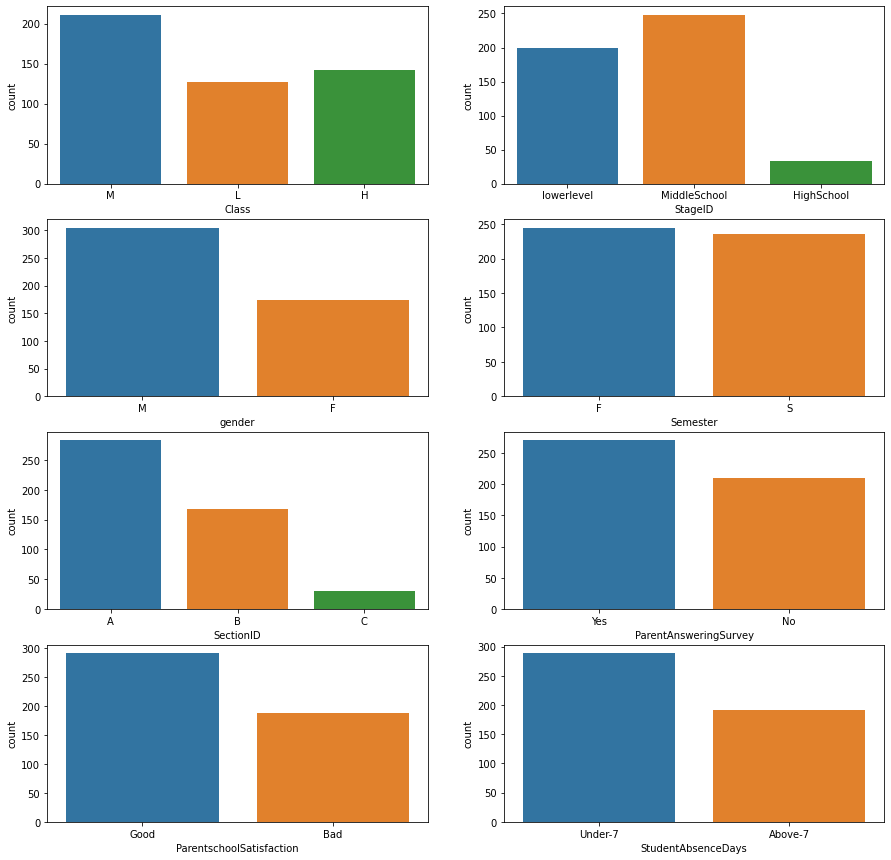

In [31]:
from matplotlib import pyplot as plt
f , axes = plt.subplots(4,2,figsize=(15,15))


sns.countplot(x='StageID',data=education,ax=axes[0,1])
sns.countplot(x='Class',data=education,ax=axes[0,0])
sns.countplot(x='gender',data=education,ax=axes[1,0])
sns.countplot(x='Semester',data=education,ax=axes[1,1])
sns.countplot(x='SectionID',data=education,ax=axes[2,0])
sns.countplot(x='ParentAnsweringSurvey',data=education,ax=axes[2,1])
sns.countplot(x='ParentschoolSatisfaction',data=education,ax=axes[3,0])
sns.countplot(x='StudentAbsenceDays',data=education,ax=axes[3,1])

<AxesSubplot:xlabel='GradeID', ylabel='count'>

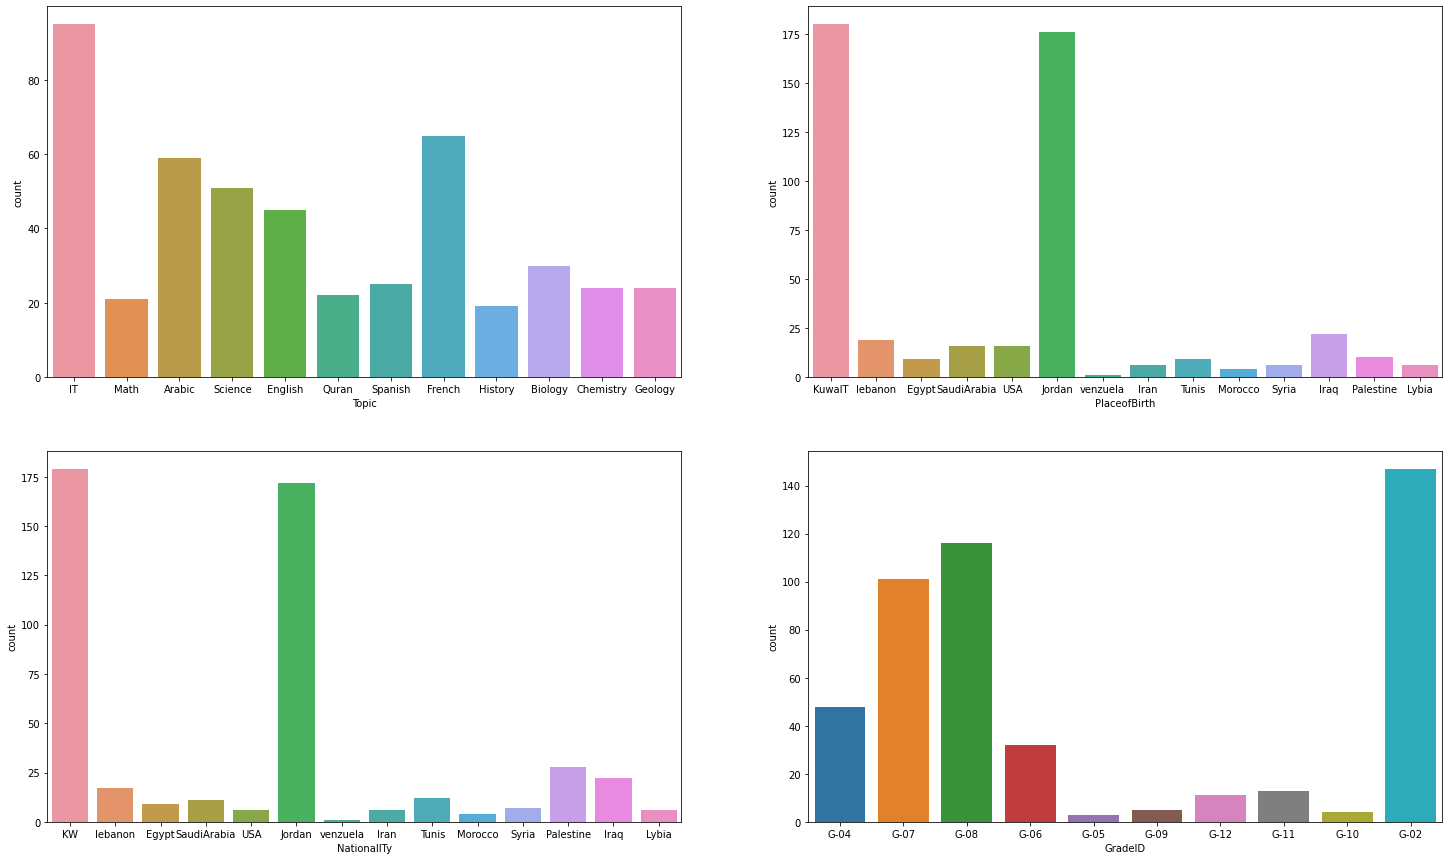

In [32]:
f , axes = plt.subplots(2,2,figsize=(25,15))
sns.countplot(x='Topic',data=education,ax=axes[0,0])
sns.countplot(x='PlaceofBirth',data=education,ax=axes[0,1])
sns.countplot(x='NationalITy',data=education,ax=axes[1,0])
sns.countplot(x='GradeID',data=education,ax=axes[1,1])

* According to graph analyze the above plot IT topic is prefered by students and most of student are from kw and Jordan

### Q2.Look at some categorical features in relation to each other, to see what insights could be possibly read?

<AxesSubplot:xlabel='ParentAnsweringSurvey', ylabel='count'>

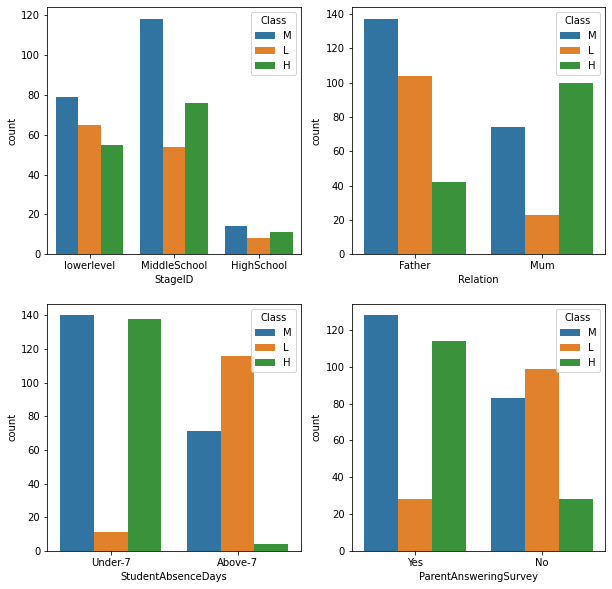

In [33]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.countplot(x='StageID',hue='Class',data=education,ax=axarr[0,0])
sns.countplot(x='Relation',hue='Class',data=education, ax=axarr[0,1])
sns.countplot(x='StudentAbsenceDays',hue='Class',data=education, ax=axarr[1,0])
sns.countplot(x='ParentAnsweringSurvey',hue='Class',data=education, ax=axarr[1,1])

<AxesSubplot:xlabel='NationalITy', ylabel='count'>

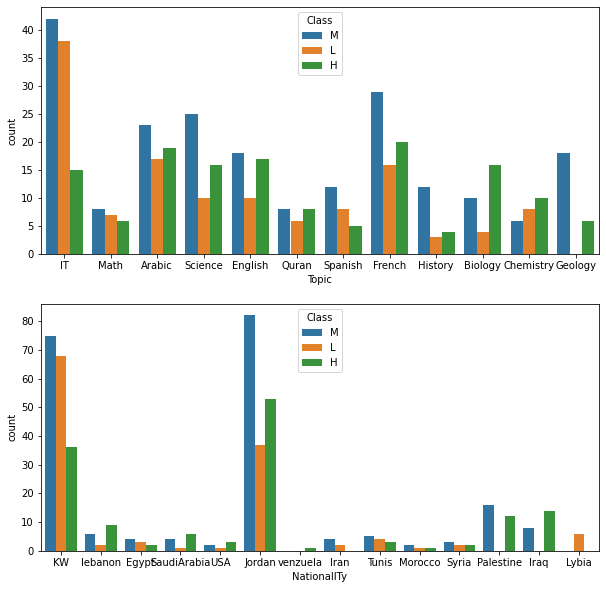

In [34]:
fig,(axis1,axis2) =plt.subplots (2,1, figsize=(10,10))
sns.countplot(x='Topic',hue='Class',data=education,ax=axis1)
sns.countplot(x='NationalITy',hue='Class',data=education, ax=axis2)

### Q3.Visualize categorical variables with numerical variables and give conclusions?

<AxesSubplot:xlabel='gender', ylabel='Discussion'>

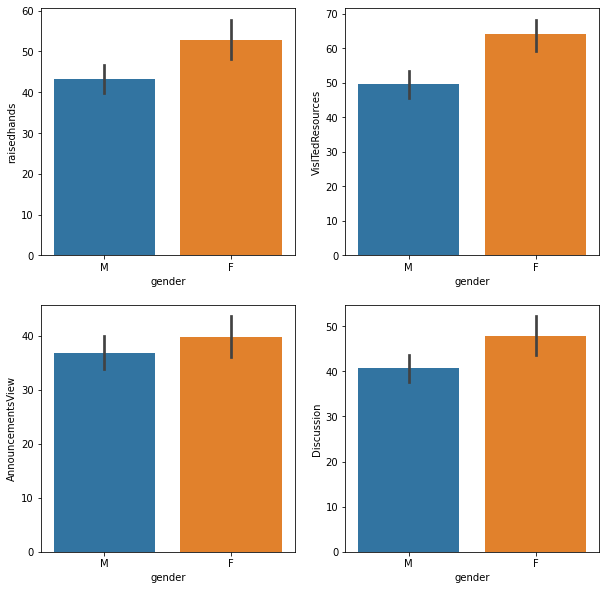

In [35]:
fig,axarr =plt.subplots (2,2, figsize=(10,10))
sns.barplot(x='gender',y='raisedhands',data=education,ax=axarr[0,0])
sns.barplot(x='gender',y='VisITedResources',data=education, ax=axarr[0,1])
sns.barplot(x='gender',y='AnnouncementsView',data=education, ax=axarr[1,0])
sns.barplot(x='gender',y='Discussion',data=education, ax=axarr[1,1])

* Raisehands:-Male has raised less hands compare to female.
* VisitedResources:-male has less visited compare to female
* AnnouncementView:-Male announcement views less comapre to female
* Discussion:-Male students discuss less as comapre to female so it observed that female performance is good comapred to male

### Q4. From the above result, what are the factors that leads to get low grades of the students?



* It is obsersved that females have the highest interaction and discussions as compared to male.
* male have less attendence compared to females and it affects to their grade.
* male has less raise-hands in class  so it affects to their low grade.
* The student who getting low grade because of less visited-resources.
* The students have less AnnouncementsView also getting low grades.
* The student who doesn't discusse or cleared doubt with their teachers also have low grades.


### Q5. Build classification model and present it's classification report?

### Outliers

<AxesSubplot:>

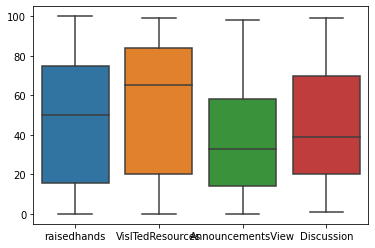

In [37]:
sns.boxplot(data=education)

In [38]:
education.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [39]:
education=education.drop(['NationalITy','PlaceofBirth','StageID','GradeID','SectionID'],axis=1)
education.head()

,gender,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


### Breaking Data into Two Part

* Quantitative Variable
* Qualitative Variable

In [46]:
Quantitative_Variable = education[education.select_dtypes(include=[np.number]).columns.tolist()]
Quantitative_Variable.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,15,16,2,20
1,20,20,3,25
2,10,7,0,30
3,30,25,5,35
4,40,50,12,50


In [47]:
Qualitative_Variable = education[education.select_dtypes(include=['object']).columns.tolist()]
Qualitative_Variable.head()

,gender,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,IT,F,Father,Yes,Good,Under-7,M
1,M,IT,F,Father,Yes,Good,Under-7,M
2,M,IT,F,Father,No,Bad,Above-7,L
3,M,IT,F,Father,No,Bad,Above-7,L
4,M,IT,F,Father,No,Bad,Above-7,M


### Converting qualitative Variable into number

In [48]:
from sklearn.preprocessing import LabelEncoder
Qualitative_Variable=Qualitative_Variable.apply(LabelEncoder().fit_transform) 
Qualitative_Variable.head()

,gender,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,7,0,0,1,1,1,2
1,1,7,0,0,1,1,1,2
2,1,7,0,0,0,0,0,1
3,1,7,0,0,0,0,0,1
4,1,7,0,0,0,0,0,2


### Combining the data set

In [49]:
Final_combined = pd.concat([Qualitative_Variable, Quantitative_Variable],axis=1)
Final_combined.head()

,gender,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,raisedhands,VisITedResources,AnnouncementsView,Discussion
0,1,7,0,0,1,1,1,2,15,16,2,20
1,1,7,0,0,1,1,1,2,20,20,3,25
2,1,7,0,0,0,0,0,1,10,7,0,30
3,1,7,0,0,0,0,0,1,30,25,5,35
4,1,7,0,0,0,0,0,2,40,50,12,50


* Splitting the data in Train and Test set
* Train would contain 70% and test would contain 30% of the dataset
* Setting random_state

In [51]:
from sklearn.model_selection import train_test_split

x = Final_combined.drop('Class', axis = 1)
y = Final_combined[['Class']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=58)

### Model building

* H0: There is no log linear relationship between ParentschoolSatisfaction and all independent variable 
  
  vs
  
  
* H1 :- There is log linear relationship between ParentschoolSatisfaction and all independent Variable( Alpha = 0.05 (5%))

### Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
output=logreg.fit(x_train, y_train)

### Predictions on Train Dataset

In [53]:
train=pd.concat([x_train,y_train],axis=1)
train.head()

,gender,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class
304,0,10,0,0,1,0,1,15,50,24,43,2
311,1,10,1,0,0,1,0,42,34,29,39,2
308,1,10,0,1,1,1,0,95,57,74,89,2
80,1,8,0,0,1,0,1,8,15,10,40,1
220,1,11,1,0,1,1,1,77,69,41,13,2


In [54]:
train['Predicted']=output.predict(x_train)
train.head()

,gender,Topic,Semester,Relation,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,Predicted
304,0,10,0,0,1,0,1,15,50,24,43,2,2
311,1,10,1,0,0,1,0,42,34,29,39,2,1
308,1,10,0,1,1,1,0,95,57,74,89,2,2
80,1,8,0,0,1,0,1,8,15,10,40,1,2
220,1,11,1,0,1,1,1,77,69,41,13,2,2


### Model Performance Metrics

* Checking by confusion matrix

In [62]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(train['Predicted'],train['Class'])
print(matrix)

[[ 77   0  30]
 [  1  71  15]
 [ 27  12 103]]


In [57]:
accuracy_train = ((87+171)/336)*100
accuracy_train

76.78571428571429

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train['ParentschoolSatisfaction'],train['Predicted']))

In [61]:
from sklearn.metrics import classification_report
print(classification_report(train['Class'],train['Predicted']))

              precision    recall  f1-score   support

           0       0.72      0.73      0.73       105
           1       0.82      0.86      0.84        83
           2       0.73      0.70      0.71       148

    accuracy                           0.75       336
   macro avg       0.75      0.76      0.76       336
weighted avg       0.75      0.75      0.75       336



* Accuracy of model is 75% ,hence the model is good fit
* Accuracy of Bad School Capture by model is 84% (Sensitivity)
* Accuracy of Good School capture by model is 66% (Specificity)